In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [2]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# Customer Personality Analysis
Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

## Project Objective


In [3]:
marketing_data = pd.read_csv("data/marketing_campaign.csv",sep="\t")

In [4]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Description of Data

As can be seen by the above, the majority of the data are 64 bit integeres except for Education (string), Martial_Status (string), Income (float), and Dt_Customer (date).  As per the Kaggle data overview the meaning of the dimensions are as follows:

### Attributes

#### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Exploratory Data Analysis (EDA)

### Inspect

In [5]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
print ("Shape: ",marketing_data.shape)
print ("Check for N/A:")
print(marketing_data.isna().sum())

Shape:  (2240, 29)
Check for N/A:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
marketing_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
marketing_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Note: Income contains null - to be addressed in data cleaning.

### Visualize

Text(0.5, 1.0, 'Income of Consumers')

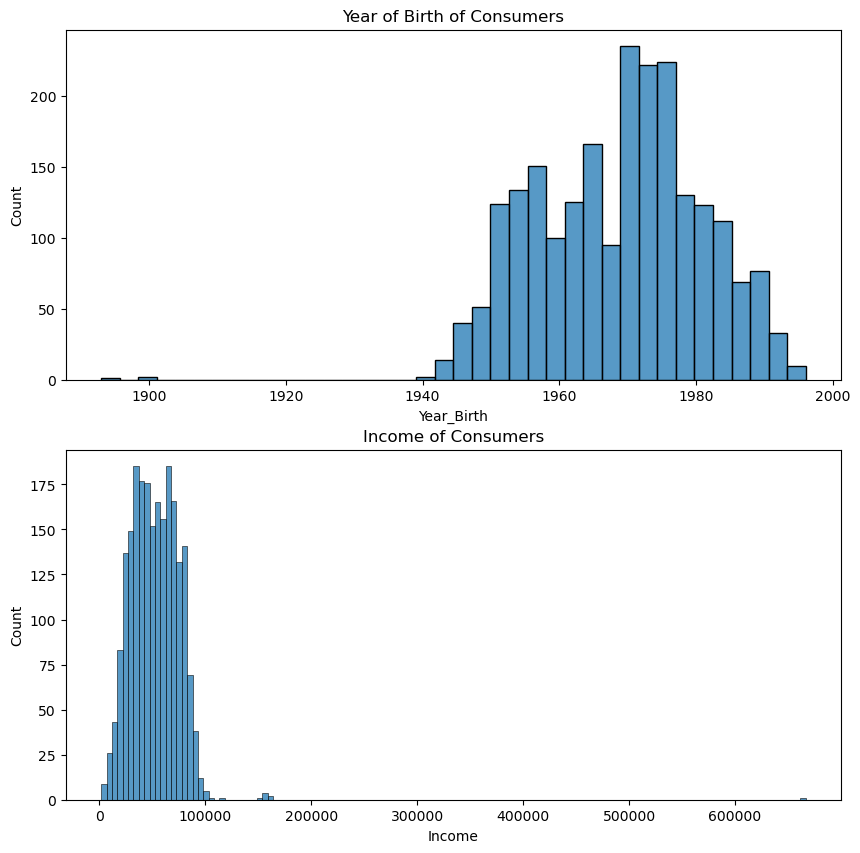

In [9]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.histplot(data=marketing_data, x="Year_Birth")
plt.title("Year of Birth of Consumers")


plt.subplot(2,1,2)
sns.histplot(data=marketing_data, x="Income")
plt.title("Income of Consumers")



Both of the above charts appear to indicate outliers that will be considered for removal in the data cleaning stage

Text(0.5, 1.0, 'Maritial Status of Consumers')

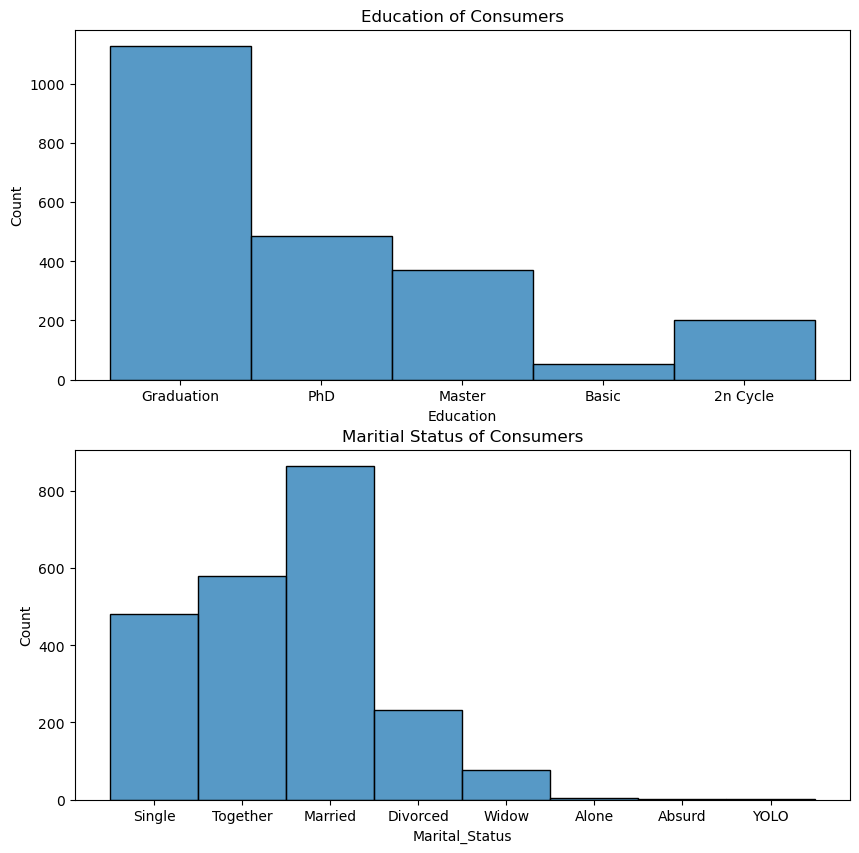

In [10]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.histplot(data=marketing_data,x="Education",)
plt.title("Education of Consumers")


plt.subplot(2,1,2)
sns.histplot(data=marketing_data,x="Marital_Status",)
plt.title("Maritial Status of Consumers")


Text(0, 0.5, 'Average Income')

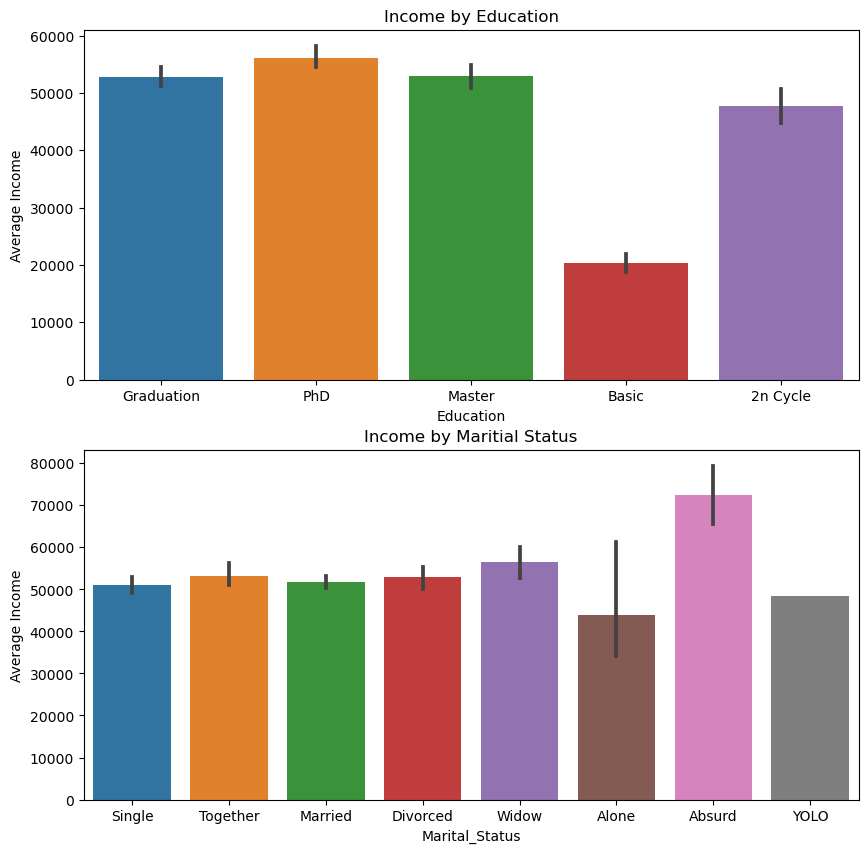

In [11]:
plt.figure(figsize = (10,10))


plt.subplot(2,1,1)
sns.barplot(data=marketing_data,x="Education",y="Income")
plt.title("Income by Education")
plt.ylabel("Average Income")

plt.subplot(2,1,2)
sns.barplot(data=marketing_data,x="Marital_Status",y="Income")
plt.title("Income by Maritial Status")
plt.ylabel("Average Income")

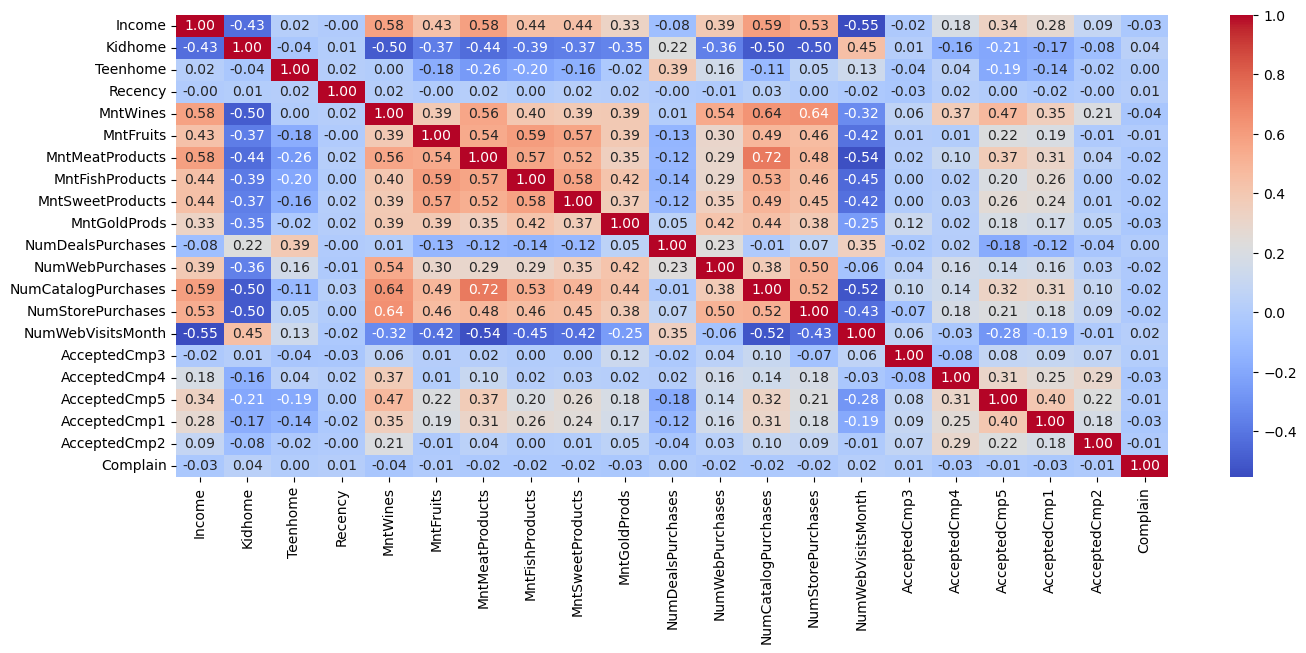

In [12]:
df = marketing_data.drop(["ID","Year_Birth","Education","Marital_Status","Dt_Customer","Z_Revenue","Z_CostContact","Response"],axis=1)
plt.figure(figsize=(16,6))
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

### Can we spot any trends in the data?
#### There appears to be some correlation between income and amount spent in each of the categories

(0.0, 120000.0)

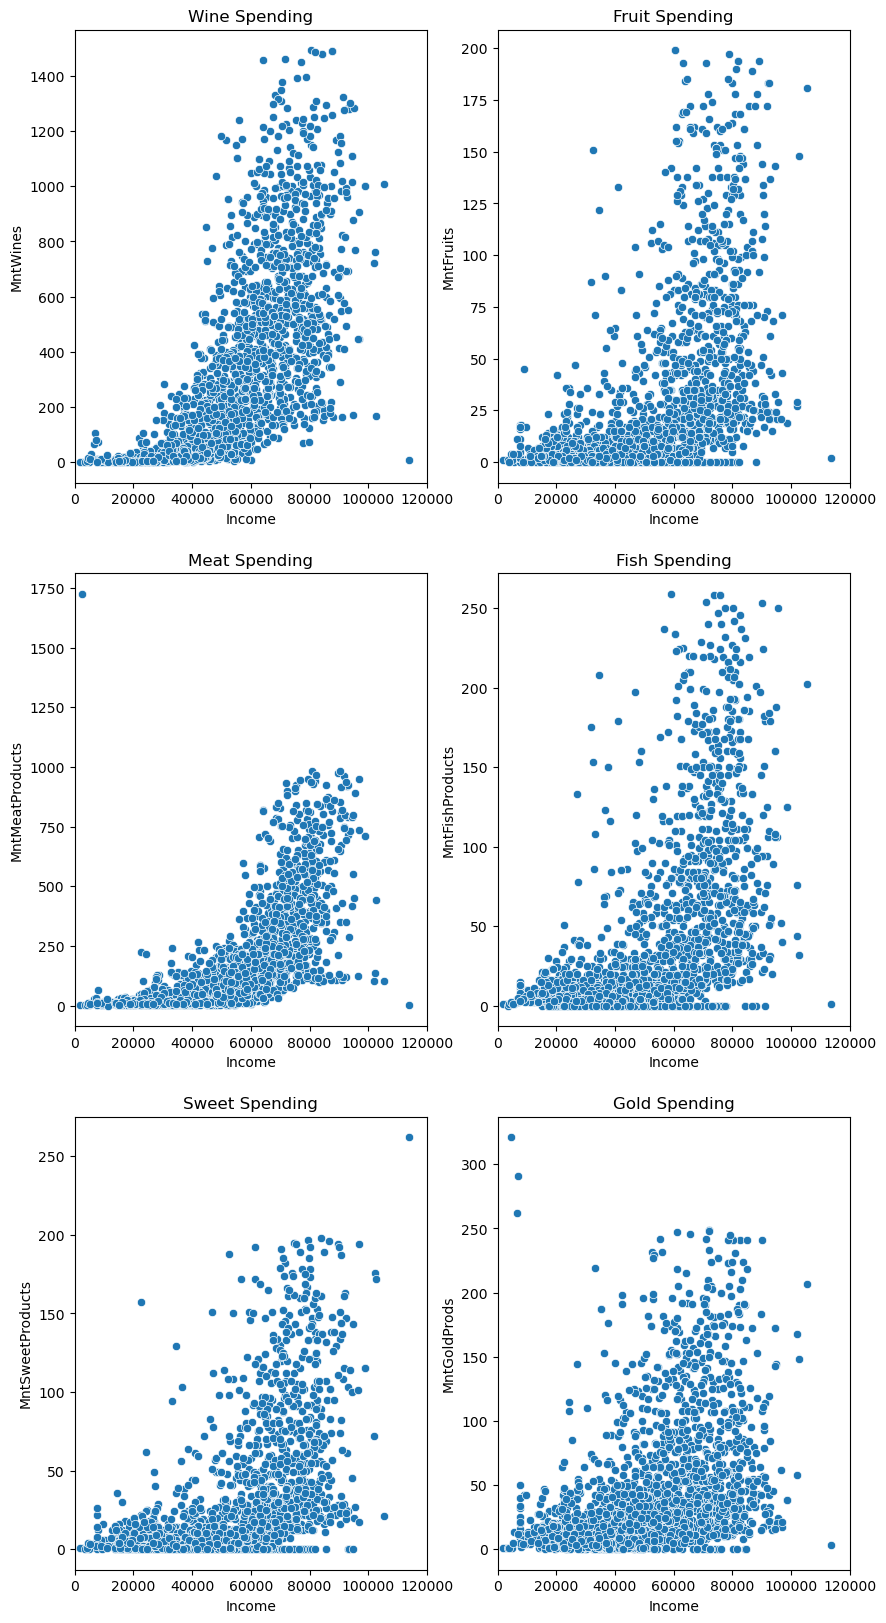

In [13]:
plt.figure(figsize = (10,20))
plt.subplot(3,2,1)
sns.scatterplot(data=marketing_data,x="Income",y="MntWines")
plt.title("Wine Spending")
plt.xlim(0,120000)


plt.subplot(3,2,2)
sns.scatterplot(data=marketing_data,x="Income",y="MntFruits")
plt.title("Fruit Spending")
plt.xlim(0,120000)

plt.subplot(3,2,3)
sns.scatterplot(data=marketing_data,x="Income",y="MntMeatProducts")
plt.title("Meat Spending")
plt.xlim(0,120000)

plt.subplot(3,2,4)
sns.scatterplot(data=marketing_data,x="Income",y="MntFishProducts")
plt.title("Fish Spending")
plt.xlim(0,120000)

plt.subplot(3,2,5)
sns.scatterplot(data=marketing_data,x="Income",y="MntSweetProducts")
plt.title("Sweet Spending")
plt.xlim(0,120000)

plt.subplot(3,2,6)
sns.scatterplot(data=marketing_data,x="Income",y="MntGoldProds")
plt.title("Gold Spending")
plt.xlim(0,120000)

### Do similiar factors drive what and how products are purchased?

In [14]:
## Initial cleaning of the data
### Remove fields note defined in the project (eg. Z_Revenue) or obvios fields such as ID
### encode lablels

lbl = LabelEncoder()
marketing_data_modified = marketing_data
marketing_data_modified = marketing_data_modified.drop(['Dt_Customer','Z_Revenue','Z_CostContact','ID'],axis=1)
marketing_data_modified['Education'] = lbl.fit_transform(marketing_data_modified['Education'])
marketing_data_modified['Marital_Status'] = lbl.fit_transform(marketing_data_modified['Marital_Status'])

mean_income=marketing_data_modified['Income'].mean()
marketing_data_modified = marketing_data_modified.fillna(mean_income)


Using a Random Forest Classifier, look to see if differet types of purchases are all correlated to the same or a different set of features.



                Feature  Web_Purchase  Catalog_Purchase  Store_Purchase  \
0            Year_Birth      0.059693          0.050195        0.057407   
1             Education      0.024737          0.021770        0.025307   
2        Marital_Status      0.029457          0.027154        0.029916   
3                Income      0.078163          0.081921        0.081525   
4               Kidhome      0.012655          0.014317        0.014383   
5              Teenhome      0.015141          0.011593        0.012801   
6               Recency      0.058848          0.052889        0.061736   
7              MntWines      0.118892          0.132583        0.123543   
8             MntFruits      0.057664          0.060265        0.061553   
9       MntMeatProducts      0.110045          0.103021        0.099194   
10      MntFishProducts      0.056486          0.059061        0.059965   
11     MntSweetProducts      0.059349          0.055030        0.058362   
12         MntGoldProds  

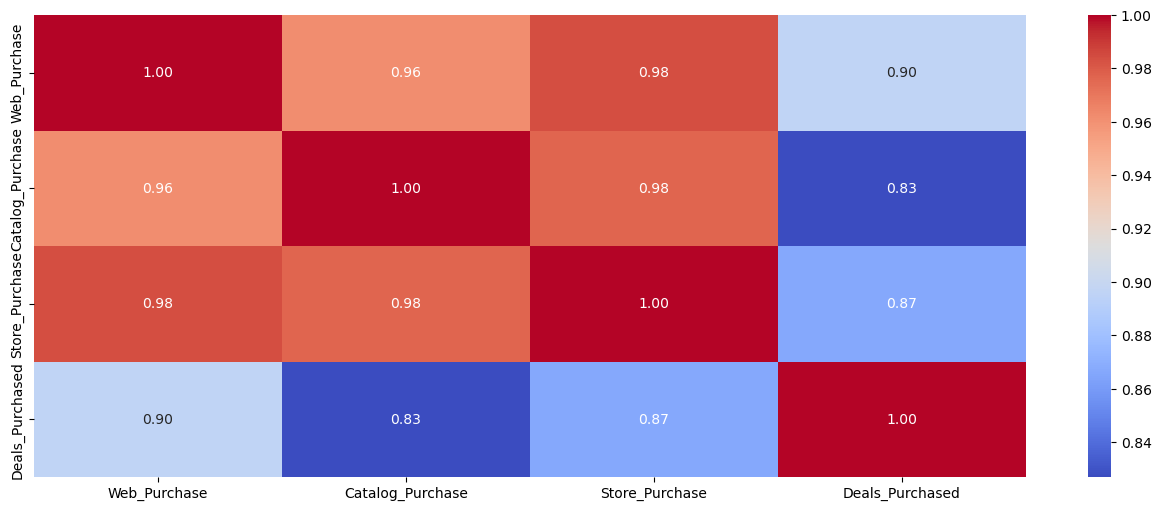

In [15]:
rf_classifier = RandomForestClassifier(random_state=1)

X = marketing_data_modified.drop(['NumWebPurchases'],axis=1)
y = marketing_data_modified['NumWebPurchases']
rf_classifier.fit(X, y)
feature_WP = rf_classifier.feature_importances_


X = marketing_data_modified.drop(['NumCatalogPurchases'],axis=1)
y = marketing_data_modified['NumCatalogPurchases']
rf_classifier.fit(X, y)
feature_CP = rf_classifier.feature_importances_

X = marketing_data_modified.drop(['NumStorePurchases'],axis=1)
y = marketing_data_modified['NumStorePurchases']
rf_classifier.fit(X, y)
feature_SP = rf_classifier.feature_importances_

X = marketing_data_modified.drop(['NumDealsPurchases'],axis=1)
y = marketing_data_modified['NumDealsPurchases']
rf_classifier.fit(X, y)
feature_DP = rf_classifier.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Web_Purchase': feature_WP, 
                                      'Catalog_Purchase' : feature_CP,'Store_Purchase' : feature_SP,
                                     'Deals_Purchased' : feature_DP})
print (feature_importance_df)

columns = ['Web_Purchase','Catalog_Purchase','Store_Purchase','Deals_Purchased']
df = feature_importance_df[columns]
plt.figure(figsize=(16,6))
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

Based upon the Heat Map below, it appears reasonable to conclude that a similiar feature set drives different forms of purchases.  This can allow us to consider to reduce the overall feature set at a later step and focus only ones correlated to consumption habits.

In [16]:


feature_importance_df['average'] =  np.mean(feature_importance_df[columns],axis=1)
feature_importance_df = feature_importance_df.sort_values(by='average', ascending=False)
feature_importance_df.loc[feature_importance_df['average'] >= 0.02]["Feature"].to_numpy()



array(['MntWines', 'MntMeatProducts', 'Income', 'MntGoldProds',
       'NumStorePurchases', 'MntFruits', 'NumWebVisitsMonth', 'Recency',
       'MntFishProducts', 'Year_Birth', 'MntSweetProducts',
       'NumWebPurchases', 'NumCatalogPurchases', 'Marital_Status',
       'Teenhome', 'Education'], dtype=object)

#### Is there any trends or correlations in types of purchases
Based upon the below heatmap, it appears that a given consumer will however prefer to purchase through a specific channel (ie. Web, Catalog, Stores or only when deals).  This seems to indicate that there are in fact differences in the types of consumers.

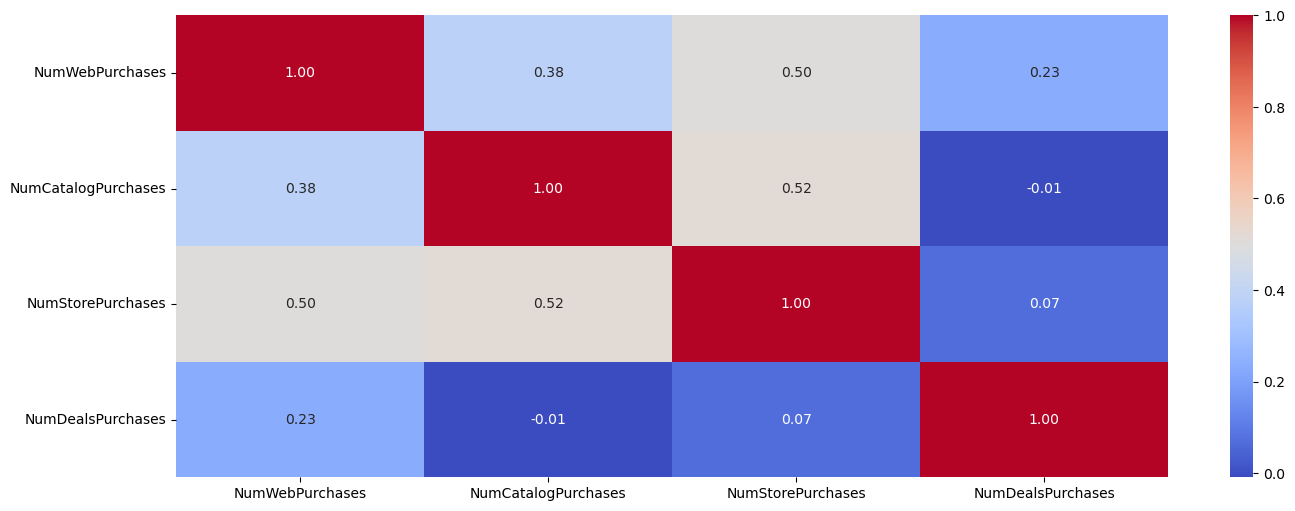

In [17]:
columns_purchase = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']
df = marketing_data[columns_purchase]
plt.figure(figsize=(16,6))
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

(0.0, 120000.0)

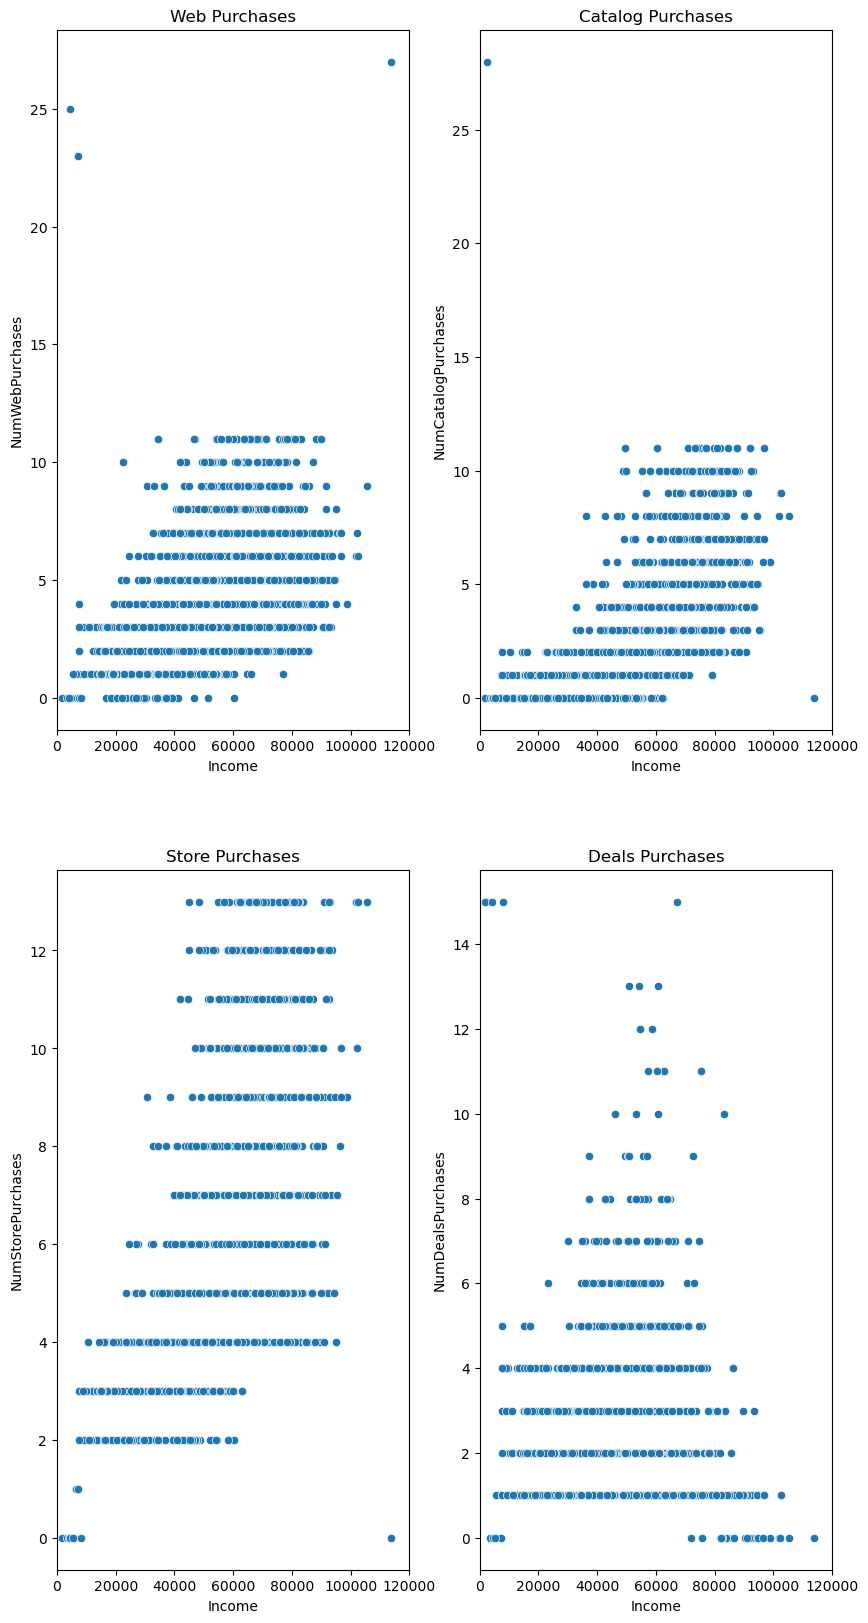

In [18]:
plt.figure(figsize = (10,20))
plt.subplot(2,2,1)
sns.scatterplot(data=marketing_data,x="Income",y="NumWebPurchases")
plt.title("Web Purchases")
plt.xlim(0,120000)

plt.subplot(2,2,2)
sns.scatterplot(data=marketing_data,x="Income",y="NumCatalogPurchases")
plt.title("Catalog Purchases")
plt.xlim(0,120000)

plt.subplot(2,2,3)
sns.scatterplot(data=marketing_data,x="Income",y="NumStorePurchases")
plt.title("Store Purchases")
plt.xlim(0,120000)

plt.subplot(2,2,4)
sns.scatterplot(data=marketing_data,x="Income",y="NumDealsPurchases")
plt.title("Deals Purchases")
plt.xlim(0,120000)



There appear to be some correlations between income and method of purchases

### Clean Data

In [19]:
marketing_data_clean = marketing_data




#NumDealsPurchases       0
#NumWebPurchases         0
#NumCatalogPurchases     0
#NumStorePurchases       0
#NumWebVisitsMonth       0
focus_columns = ['Year_Birth','Income','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts',
                 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
marketing_data_modified = marketing_data[focus_columns]

In [20]:
marketing_data_modified

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,0,0,635,88,546,635,88,546,172,88,88
1,1954,46344.0,1,1,11,1,6,11,1,6,2,1,6
2,1965,71613.0,0,0,426,49,127,426,49,127,111,21,42
3,1984,26646.0,1,0,11,4,20,11,4,20,10,3,5
4,1981,58293.0,1,0,173,43,118,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,709,43,182,709,43,182,42,118,247
2236,1946,64014.0,2,1,406,0,30,406,0,30,0,0,8
2237,1981,56981.0,0,0,908,48,217,908,48,217,32,12,24
2238,1956,69245.0,0,1,428,30,214,428,30,214,80,30,61


In [21]:
#Remove then nulls from income found earlier
mean_income=marketing_data_modified['Income'].mean()

marketing_data_modified = marketing_data_modified.fillna(mean_income)

marketing_data_modified.isnull().sum()

Year_Birth          0
Income              0
Kidhome             0
Teenhome            0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64

## Model building and training

### Dimensionality Reduction

The data set analyized contains many factors which may be utlized to classify. A higher the number of features may make it more difficult to work with the data and make sense of of.  Additionally there may be a high degree of correlation amoungs these features.
Therefore for this purpose of this analysis Principal component analysis (PCA) is used to perform dimensionality reduction on the selected features before.  This reduced data set can then be utilized more effectivly by other predicion models.




In [22]:
pca = PCA(n_components=2)
pca.fit(marketing_data_modified)
data_pca2 = pd.DataFrame(pca.transform(marketing_data_modified), columns=(["col1","col2"]))
data_pca2.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,1.429206e-12,25040.017596,-50519.294770,-16712.948082,-510.449478,16053.134953,614358.038735
col2,2240.0,5.034703e-14,405.583935,-1427.410616,-146.434372,88.516048,229.291266,8400.666971


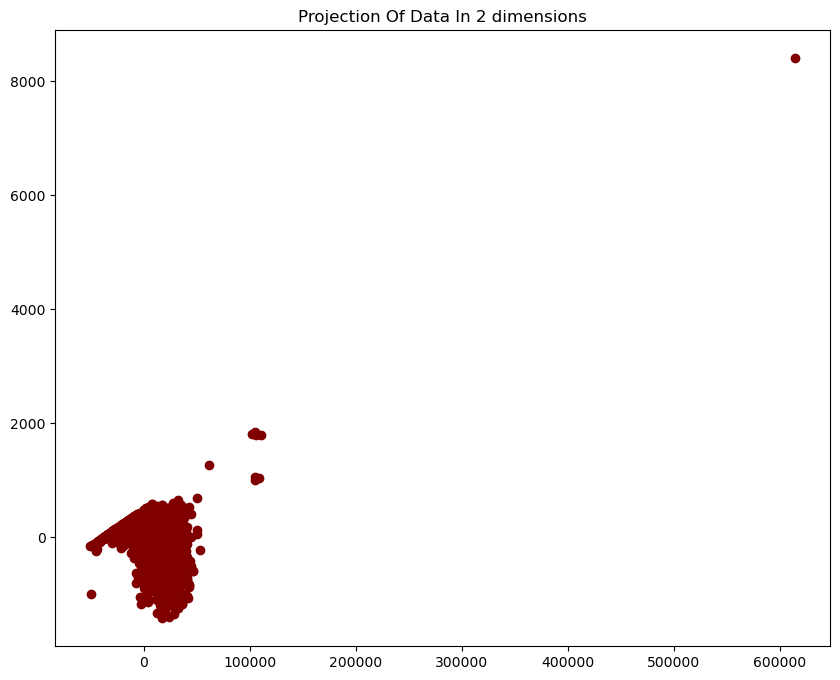

In [23]:
x =data_pca2["col1"]
y =data_pca2["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("Projection Of Data In 2 dimensions")
plt.show()

In [24]:
pca = PCA(n_components=3)
pca.fit(marketing_data_modified)
data_pca3 = pd.DataFrame(pca.transform(marketing_data_modified), columns=(["col1","col2","col3"]))
print("Explained Variance Ratios: ", pca.explained_variance_ratio_)
print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))

Explained Variance Ratios:  [9.99636475e-01 2.62261369e-04 8.91200430e-05]
Total Explained Variance:  0.9999878560435095


In [25]:
data_pca3.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,1.455192e-12,25040.017596,-50519.294770,-16712.948082,-510.449478,16053.134953,614358.038735
col2,2240.0,4.953498e-14,405.583935,-1427.410616,-146.434372,88.516048,229.291266,8400.666971
col3,2240.0,1.989520e-14,236.429289,-2033.531490,-94.542409,-12.703865,49.504768,2352.658004


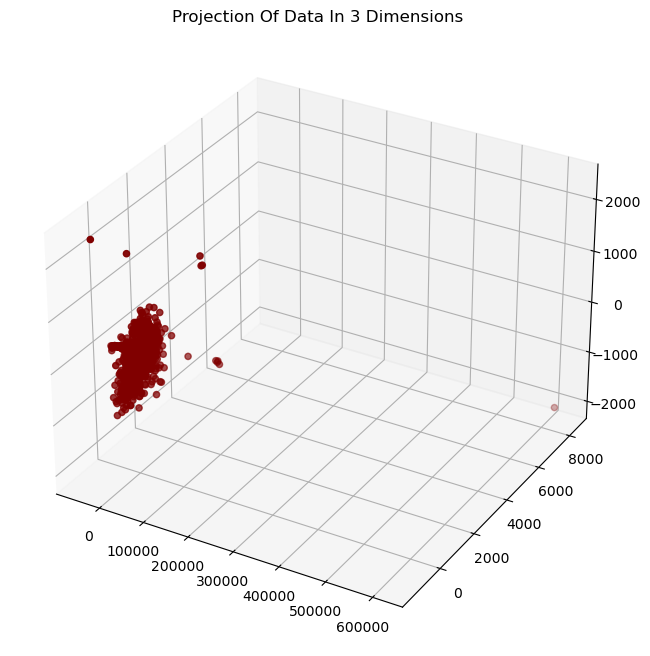

In [26]:
x =data_pca3["col1"]
y =data_pca3["col2"]
z =data_pca3["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Projection Of Data In 3 Dimensions")
plt.show()

In [27]:
pca = PCA(n_components=3, whiten=True)
pca.fit(marketing_data_modified)
print("Explained Variance Ratios: ", pca.explained_variance_ratio_)
print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))

Explained Variance Ratios:  [9.99636475e-01 2.62261369e-04 8.91200430e-05]
Total Explained Variance:  0.9999878560435091


### Clustering

Once the dimensionality of the data has been reduced it is time to perform clustering vusing Agglomerative clustering, which is a hierarchical clustering method involving merging examples until the desired number of clusters is achieved.


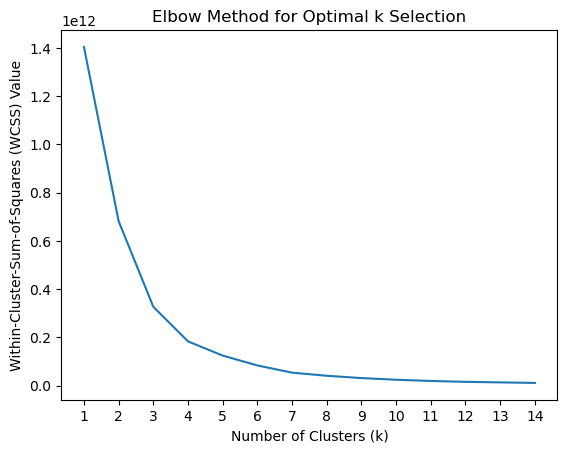

In [28]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k,n_init=5)
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.xlabel("Number of Clusters (k)")
plt.xticks(range(1, 15, 1))
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS) Value")
plt.title("Elbow Method for Optimal k Selection")
plt.show()

In [29]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters,n_init=1)
clusters = kmeans.fit_predict(data_pca3)

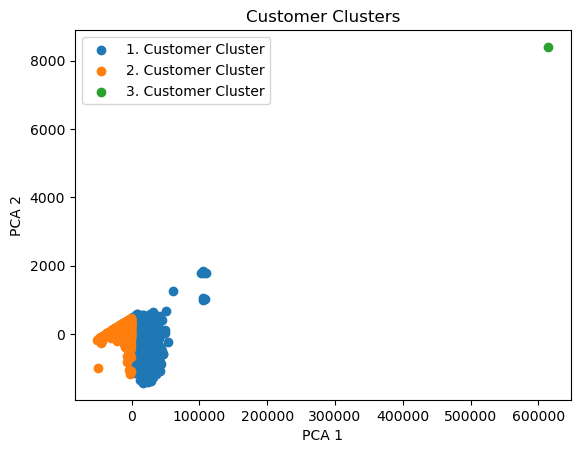

In [30]:

colors = plt.colormaps.get_cmap('tab10')
for cluster_num in range(3):
    plt.scatter(data_pca3.loc[clusters == cluster_num]['col1'], 
                data_pca3.loc[clusters == cluster_num]['col2'], 
                label=f'{cluster_num + 1}. Customer Cluster', 
                color=colors(cluster_num))

plt.title('Customer Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()